In [274]:
import numpy as np

np.random.seed(42)

Data set at:
https://spamassassin.apache.org/old/publiccorpus/



In [4]:
from __future__ import print_function

import bs4
import requests
import os
import shutil
import tarfile

def safe_tar_members(members):
    resolve = lambda path: os.path.abspath(os.path.realpath(path))
    base_path = resolve(".")
    
    for file_info in members:
        if not file_info.isfile() and not file_info.isdir():
            print("'{}' is blocked, not file or dir".format(file_info.name), file=sys.stderr)
        if not resolve(os.path.join(base_path, file_info.name)).startswith(base_path):
            print("'{}' is blocked, illegal path".format(file_info.name), file=sys.stderr)
        yield file_info

def download_spam_data():
    DATASET_URL = r"https://spamassassin.apache.org/old/publiccorpus"
    FILE_EXTENSION = '.tar.bz2'
    LOCAL_PATH = r"~/datasets/spamassassin"

    dataset_dir = os.path.expanduser(LOCAL_PATH)
    if os.path.exists(dataset_dir):
        print("Data already exists at {}".format(dataset_dir))
        return dataset_dir

    os.makedirs(dataset_dir, exist_ok=True)

    response = requests.get(DATASET_URL)
    soup = bs4.BeautifulSoup(response.text, 'lxml')
    for link in soup.find_all('a'):
        link_href = link.get('href')
        if not link_href.endswith(FILE_EXTENSION):
            continue

        file_url = DATASET_URL + "/" + link_href
        file_path = os.path.join(dataset_dir, link_href)

        print("Downloading '{}'".format(file_url))
        response = requests.get(file_url, stream=True)
        with open(file_path, 'wb') as out_file:
            shutil.copyfileobj(response.raw, out_file)
        del response

        tar = tarfile.open(file_path, "r:bz2")
        tar.extractall(dataset_dir, members = safe_tar_members(tar))
        tar.close()

    print("Done")
    return dataset_dir

spam_data_path = download_spam_data()


Done


In [117]:
import email
from email import policy
import pickle

def read_files(dir_path):
    data = []
    for file_name in os.listdir(dir_path):
        if file_name != "cmds":
            file_path = os.path.join(dir_path, file_name)
            with open(file_path, 'rb') as file:
                data.append(email.parser.BytesParser(policy=policy.default).parse(file))
    return data

ham = []
for sub_dir in ["hard_ham", "easy_ham", "easy_ham_2"]:
    ham.extend(read_files(os.path.join(spam_data_path, sub_dir)))

spam = []
for sub_dir in ["spam", "spam_2"]:
    spam.extend(read_files(os.path.join(spam_data_path, sub_dir)))

data = {"ham": ham, "spam": spam}
MESSAGES_FILE_PATH = "spam_classifier_messages.pickle"
with open(MESSAGES_FILE_PATH, "wb") as f:
    pickle.dump(data, f)
    

In [192]:
import re

DOCTYPE_REGEX = re.compile(r"^\s*<!DOCTYPE.*?>")

del data
with open(MESSAGES_FILE_PATH, "rb") as f:
    data = pickle.load(f)

def extract_text_from_msg(msg):
    body = msg.get_body()
    if not body['content-type']:
        return body.get_content()
    if body['content-type'].maintype == 'text':
        if body['content-type'].subtype == 'plain':
            return body.get_content()
        elif body['content-type'].subtype == 'html':
            content = DOCTYPE_REGEX.sub("", body.get_content())
            soup = bs4.BeautifulSoup(content, 'lxml')
            [s.extract() for s in soup(['style', 'script', '[document]', 'head', 'title'])]
            return soup.get_text()
    return ""

print(extract_text_from_msg(data["ham"][61]))

 Bitte beachten Sie die Angebote unserer Werbepartner. 
Diese ermöglichen den kostenfreien Betrieb des Fax2Mail-Service. 
Vielen Dank.
  
    
 
 
Der neue Cyberport-Katalog ist da!
 
Reinschauen ist jetzt auch offline möglich, mit dem druckfrischen Cyberport-Katalog.
Stöbern Sie in unserem Angebot, wann und wo Sie wollen. Entdecken Sie auf 322 Seiten
sechs interessante Einkaufswelten, randvoll mit topaktuellen Highlights rund um den 
Computer, Telekommunikation und Multimedia - natürlich zu absoluten Hammerpreisen.
Bitte registrieren Sie sich hier 
Und hier unsere Shops im Überblick:   
  
Mac-Shop  Cyberdesign für jeden Tag
 
Ein Paradies für Apple-Fans! Ob iMac, iBook 
oder PowerMac: Hier finden Sie die 
aktuellsten Modelle  und dazu jede Menge 
Software und Peripherie  vom Cinema 
Display über Foto-Drucker bis zum neuen 
iPod! 
  
PC-Shop  Power satt für mehr Souveränität

Natürlich kommen Sie bei uns auch als PC-
User voll auf Ihre Kosten: Wir bieten Ihnen 
leistungsstarke PC-

In [119]:
!pip install -U spacy

    100% |████████████████████████████████| 13.3MB 88kB/s eta 0:00:01
Requirement already up-to-date: numpy>=1.7 in /Users/anton/anaconda3/envs/mlbook/lib/python3.6/site-packages (from spacy)
    100% |████████████████████████████████| 92kB 506kB/s ta 0:00:011
    100% |████████████████████████████████| 1.2MB 366kB/s ta 0:00:01
Requirement already up-to-date: six in /Users/anton/anaconda3/envs/mlbook/lib/python3.6/site-packages (from spacy)
    100% |████████████████████████████████| 51kB 463kB/s ta 0:00:01
    100% |████████████████████████████████| 194kB 445kB/s ta 0:00:01
    100% |████████████████████████████████| 71kB 476kB/s ta 0:00:01
Requirement already up-to-date: requests<3.0.0,>=2.13.0 in /Users/anton/anaconda3/envs/mlbook/lib/python3.6/site-packages (from spacy)
    100% |████████████████████████████████| 604kB 422kB/s ta 0:00:01
    100% |████████████████████████████████| 51kB 473kB/s ta 0:00:01
Requirement already up-to-date: msgpack-python in /Users/anton/anaconda3/envs/

In [134]:
!python -m spacy download en

    100% |████████████████████████████████| 37.4MB 578kB/s ta 0:00:011

    Linking successful
    /Users/anton/anaconda3/envs/mlbook/lib/python3.6/site-packages/en_core_web_sm
    -->
    /Users/anton/anaconda3/envs/mlbook/lib/python3.6/site-packages/spacy/data/en

    You can now load the model via spacy.load('en')



In [133]:
import spacy
import pandas as pd

nlp = spacy.load('en', disable=["tagger", "parser", "ner"])
doc = nlp(extract_text_from_msg(data["ham"][2]))

token_data = [(token.text, token.lemma_, token.is_punct, token.is_stop, token.is_alpha)
              for token in doc]
pd.DataFrame(token_data, columns=["Text", "Lemma", "Is Punct?", "Is Stop?", "Is Alpha?"])


,Text,Lemma,Is Punct?,Is Stop?,Is Alpha?
0,>,>,False,False,False
1,Seriously,Seriously,False,False,True
2,though,though,False,True,True
3,",",",",True,False,False
4,it,it,False,True,True
5,spurs,spur,False,False,True
6,the,the,False,True,True
7,question,question,False,False,True
8,:,:,True,False,False
9,should,should,False,True,True


In [156]:
msg_text = extract_text_from_msg(data["ham"][2])

def clean_text(text):
    doc = nlp(text)
    return " ".join([token.lemma_.lower() for token in doc
                     if not token.is_punct and not token.is_stop and token.is_alpha])

print(msg_text)
print("VS")
print(clean_text(msg_text))


> Seriously though, it spurs the question: should this list be moderated ? 
> (and the next question: if "yes", who wants to co-moderate ?)


No...the list has been on target i'd say about 95% of the time.
Iff it starts being a problem, consider it. Right now, John's
right - this remove thread is taking more time than any remove
requests have in the entire past year.

One thing you may want to consider (if feasible) - BugTraq's
adopted a technique by which they add headers to each message
indicating where to email to remove. The catch: the mail is
not sent to "majordomo" - it is sent to "listname-remove"@domain.
I've found that useful when I can't remember exactly which mail
addr I used to signup (since my email addr never shows up in
a received message, and I have multiple addresses going to the
same box).

For all that, remember, even if you put the actual removal
instructions right in the bottom of your email, you will
_still_ get the clueless asking you how to remove. (Trust me,
we

In [252]:
%%time

import sys

text_corpus = []
y = []

for i, class_name in enumerate(["ham", "spam"]):
    for j, msg in enumerate(data[class_name]):
        try:
            text = clean_text(extract_text_from_msg(msg))
        except:
            print("Failed to parse data['{}'][{}], skipping".format(class_name, j), file=sys.stderr)
        else:
            text_corpus.append(text)
            y.append(i)


Failed to parse data['spam'][87], skipping
Failed to parse data['spam'][214], skipping
Failed to parse data['spam'][459], skipping
Failed to parse data['spam'][521], skipping
Failed to parse data['spam'][548], skipping
Failed to parse data['spam'][792], skipping
Failed to parse data['spam'][873], skipping
Failed to parse data['spam'][905], skipping
Failed to parse data['spam'][918], skipping
Failed to parse data['spam'][949], skipping
Failed to parse data['spam'][1022], skipping
Failed to parse data['spam'][1023], skipping
Failed to parse data['spam'][1201], skipping
Failed to parse data['spam'][1272], skipping
Failed to parse data['spam'][1279], skipping
Failed to parse data['spam'][1459], skipping
Failed to parse data['spam'][1477], skipping
Failed to parse data['spam'][1533], skipping
Failed to parse data['spam'][1583], skipping
Failed to parse data['spam'][1589], skipping
Failed to parse data['spam'][1644], skipping
Failed to parse data['spam'][1902], skipping
Failed to parse data[

CPU times: user 2min 44s, sys: 1.35 s, total: 2min 45s
Wall time: 2min 47s


In [253]:
after = len(y)
before = len(data["ham"]) + len(data["spam"])
print("Converted {} of {} ({:.2f}%) messages".format(after, before, 100.0 * after / before))

Converted 9314 of 9349 (99.63%) messages


In [254]:
spam_msg_count = sum(y)
spam_msg_count, len(y)

(2363, 9314)

In [255]:
from sklearn.model_selection import train_test_split

text_train, text_test, y_train, y_test = train_test_split(text_corpus, y, test_size=0.2, random_state=42)

In [256]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(text_train)
X_test = vectorizer.transform(text_test)


In [257]:
X_train.shape, X_test.shape

((7451, 37527), (1863, 37527))

In [272]:
from sklearn import linear_model
import numpy as np

np.random.seed(42)

clf = linear_model.SGDClassifier()
clf.fit(X_train, y_train)

clf.score(X_test, y_test)


/Users/anton/anaconda3/envs/mlbook/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.9801395598497048

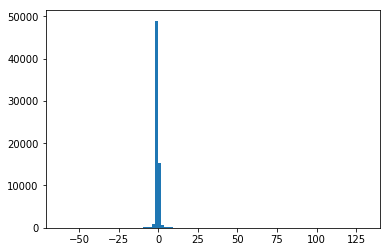

In [249]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(clf.coef_.flatten(), bins=100);


In [246]:
import numpy as np

np.histogram(clf.coef_.flatten())

(array([    1,    19,   584, 66347,    47,     3,     2,     0,     0,     1]),
 array([ -61.43148429,  -42.21780729,  -23.00413029,   -3.79045329,
          15.42322372,   34.63690072,   53.85057772,   73.06425472,
          92.27793172,  111.49160872,  130.70528572]))

In [247]:
import pandas as pd

df = pd.DataFrame(list(zip(vectorizer.get_feature_names(), clf.coef_.flatten())), columns=["word", "coef"])
df.sort_values(by=["coef"])


,word,coef
3028,2002,-61.431484
4923,3t,-35.551838
49256,re,-31.369269
42150,new,-30.323626
15541,but,-30.062216
34183,it,-30.062216
32271,if,-29.016573
45892,php,-28.755163
64024,wrote,-27.448110
61096,url,-26.925289


In [303]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score

clf = SGDClassifier(max_iter=20)
scores = cross_val_score(clf, X_train, y_train, cv=5, scoring="f1")
print("F1: %0.2f (+/- %0.2f), 95%% conf. interv." % (scores.mean(), scores.std() * 2))

F1: 0.96 (+/- 0.01), 95% conf. interv.


Random Forest uses sub-samples of the data set. Due to this, the left out portion can be used to estimate generalization error without the need of a validation set.

See for details:
- http://scikit-learn.org/stable/modules/grid_search.html#out-of-bag-estimates
- http://scikit-learn.org/stable/auto_examples/ensemble/plot_ensemble_oob.html


In [294]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(oob_score=True)
clf.fit(X_train, y_train)

clf.oob_score_


/Users/anton/anaconda3/envs/mlbook/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/anton/anaconda3/envs/mlbook/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


0.95396591061602465

In [297]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

clf = RandomForestClassifier()
scores = cross_val_score(clf, X_train, y_train, cv=5, scoring="f1")
print("F1: %0.2f (+/- %0.2f), 95%% conf. interv." % (scores.mean(), scores.std() * 2))

F1: 0.94 (+/- 0.03), 95% conf. interv.


In [298]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
scores = cross_val_score(clf, X_train, y_train, cv=5, scoring="f1")
print("F1: %0.2f (+/- %0.2f), 95%% conf. interv." % (scores.mean(), scores.std() * 2))

F1: 0.95 (+/- 0.01), 95% conf. interv.


In [301]:
from sklearn.svm import LinearSVC

clf = LinearSVC(loss='hinge')
scores = cross_val_score(clf, X_train, y_train, cv=5, scoring="f1")
print("F1: %0.2f (+/- %0.2f), 95%% conf. interv." % (scores.mean(), scores.std() * 2))

F1: 0.96 (+/- 0.01), 95% conf. interv.


In [302]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
scores = cross_val_score(clf, X_train, y_train, cv=5, scoring="f1")
print("F1: %0.2f (+/- %0.2f), 95%% conf. interv." % (scores.mean(), scores.std() * 2))

F1: 0.73 (+/- 0.06), 95% conf. interv.


In [350]:
%%time

from sklearn.model_selection import cross_validate
from collections import defaultdict

classifiers = {"SGD"    : SGDClassifier(max_iter=20),
    "RndFor" : RandomForestClassifier(),
    "NB"     : MultinomialNB(),
    "SVC"    : LinearSVC(loss='hinge')}
    
fractions = np.linspace(0.1,1,10)
results = defaultdict(lambda: defaultdict(list))
    
for fraction in fractions:
    part_size = int(X_train.shape[0]*fraction)
    X_train_part = X_train[:part_size]
    y_train_part = y_train[:part_size]
    for c in classifiers:
        # TODO Use cross_validate instead to get several metrics
        scores = cross_validate(classifiers[c], X_train_part, y_train_part, cv=5,
                                scoring=["accuracy", "f1"])
        results["accuracy_mean"][c].append(scores["test_accuracy"].mean())
        results["accuracy_std"][c].append(scores["test_accuracy"].std()*2)
        results["f1_mean"][c].append(scores["test_f1"].mean())
        results["f1_std"][c].append(scores["test_f1"].std()*2)


CPU times: user 36.7 s, sys: 588 ms, total: 37.3 s
Wall time: 37.4 s


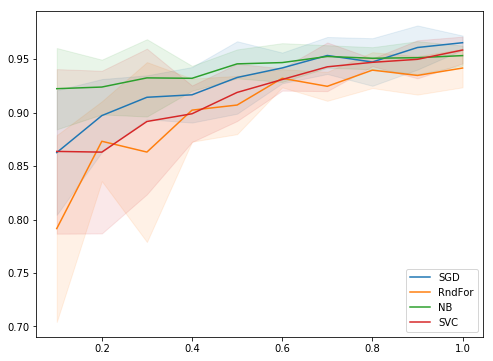

In [351]:
import matplotlib.pyplot as plt
%matplotlib inline

# Inspired by https://tonysyu.github.io/plotting-error-bars.html
def error_fill(x, y, yerr, label):
    ax = plt.gca()
    ymin = [a - b for a, b in zip(y, yerr)]
    ymax = [a + b for a, b in zip(y, yerr)]
    base_line, = ax.plot(x, y, label=label)
    ax.fill_between(x, ymax, ymin, color=base_line.get_color(), alpha=0.1)
    
def plot_results(value_dim, err_dim):
    plt.figure(figsize=(8, 6))
    for c in classifiers:
        #plt.errorbar(fractions, results[value_dim][c], yerr=results[err_dim][c], label=c)
        error_fill(fractions, results[value_dim][c], results[err_dim][c], c)
    plt.legend(loc='lower right')
    plt.show()
    
plot_results("f1_mean", "f1_std")

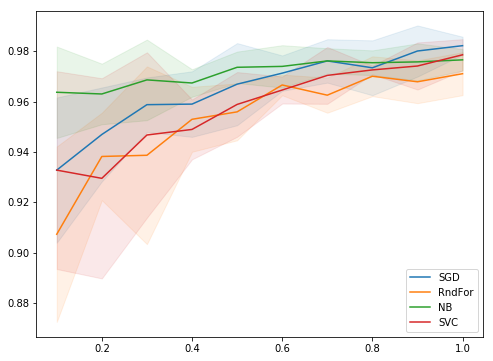

In [352]:
plot_results("accuracy_mean", "accuracy_std")

- TODO TF-IDF and read details here http://scikit-learn.org/stable/modules/feature_extraction.html

- TODO Pipeline http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#sklearn.pipeline.Pipeline.fit_transform
- TODO Grid search

- TODO Add more features (headers, etc)

- TODO Ensembles

- TODO Which messages were incorrectly classified?
- TODO Typical spam (when highly confident that spam)


- Use cross validation

- Use pipelines to decide if:

    - BoW should include counts
    - Strip email headers
    - Remove punctuation
    - Do stemming (use NLTK), etc.
    - Try using character ngrams (char_wb)
    - Try several classifiers

- Do grid/random/… search for optimal hyper parameters, including pipeline

- Follow "Machine Learning Project Checklist" from the book

- Exercise description is at page 232 of book "Hands-On Machine Learning…"

- Use ideas from http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html

- https://stats.stackexchange.com/questions/285271/difference-between-naive-bayes-vs-recurrent-neural-network-lstm